---
title: Four Bar Dynamics with unit Scaling
---

In [1]:
%matplotlib inline

In [2]:
"""
Written by Daniel M. Aukes
Email: danaukes<at>gmail.com
Please see LICENSE for full license.
"""

'\nWritten by Daniel M. Aukes\nEmail: danaukes<at>gmail.com\nPlease see LICENSE for full license.\n'

In [3]:
import pynamics
from pynamics.frame import Frame
import idealab_tools.units
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
import pynamics.integration
from pynamics.constraint import KinematicConstraint,AccelerationConstraint

In [4]:
import sympy
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
system = System()
pynamics.set_system(__name__,system)

In [5]:
idealab_tools.units.Unit.set_scaling(meter=1)

In [6]:
lA = Constant(1.1*idealab_tools.units.length,'lA',system)
lB = Constant(1*idealab_tools.units.length,'lB',system)
lC = Constant(.9*idealab_tools.units.length,'lC',system)
lD = Constant(1.01*idealab_tools.units.length,'lD',system)

m = Constant(1*idealab_tools.units.mass,'m',system)

g = Constant(9.81*idealab_tools.units.acceleration,'g',system)

Ixx_A = Constant(1*idealab_tools.units.inertia,'Ixx_A',system)
Iyy_A = Constant(1*idealab_tools.units.inertia,'Iyy_A',system)
Izz_A = Constant(1*idealab_tools.units.inertia,'Izz_A',system)
Ixx_B = Constant(1*idealab_tools.units.inertia,'Ixx_B',system)
Iyy_B = Constant(1*idealab_tools.units.inertia,'Iyy_B',system)
Izz_B = Constant(1*idealab_tools.units.inertia,'Izz_B',system)
Ixx_C = Constant(1*idealab_tools.units.inertia,'Ixx_C',system)
Iyy_C = Constant(1*idealab_tools.units.inertia,'Iyy_C',system)
Izz_C = Constant(1*idealab_tools.units.inertia,'Izz_C',system)
Ixx_D = Constant(1*idealab_tools.units.inertia,'Ixx_D',system)
Iyy_D = Constant(1*idealab_tools.units.inertia,'Iyy_D',system)
Izz_D = Constant(1*idealab_tools.units.inertia,'Izz_D',system)

In [7]:
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
qC,qC_d,qC_dd = Differentiable('qC',system)
qD,qD_d,qD_dd = Differentiable('qD',system)

initialvalues = {}
initialvalues[qA]=20*pi/180*idealab_tools.units.radian
initialvalues[qA_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qB]=90*pi/180*idealab_tools.units.radian
initialvalues[qB_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qC]=140*pi/180*idealab_tools.units.radian
initialvalues[qC_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qD]=-90*pi/180*idealab_tools.units.radian
initialvalues[qD_d]=0*pi/180*idealab_tools.units.rotational_speed

In [8]:
statevariables = system.get_state_variables()

In [9]:
N = Frame('N',system)
A = Frame('A',system)
B = Frame('B',system)
C = Frame('C',system)
D = Frame('D',system)

In [10]:
system.set_newtonian(N)

In [11]:
A.rotate_fixed_axis(N,[0,0,1],qA,system)
B.rotate_fixed_axis(A,[0,0,1],qB,system)
C.rotate_fixed_axis(N,[0,0,1],qC,system)
D.rotate_fixed_axis(C,[0,0,1],qD,system)

In [12]:
pNA = 0*N.x
pAB = pNA + lA*A.x
pBD = pAB + lB*B.x
pCD = pNA + lC*C.x
pDB = pCD + lD*D.x

In [13]:
points = [pBD,pAB,pNA,pCD,pDB]

In [14]:
statevariables = system.get_state_variables()
ini0 = [initialvalues[item] for item in statevariables]

In [15]:
eq = []
eq.append(pBD-pDB)

In [16]:
eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))

In [17]:
c=KinematicConstraint(eq_scalar)

In [18]:
variables = [qB,qD]

In [19]:
constant_states = list(set(system.get_q(0))-set(variables))

In [20]:
constants = system.constant_values.copy()

In [21]:
for key in constant_states:
    constants[key] = initialvalues[key] 

In [22]:
guess = [initialvalues[item] for item in variables]

In [23]:
result = c.solve_numeric(variables,guess,constants)

In [24]:
ini = []
for item in system.get_state_variables():
    if item in variables:
        ini.append(result[item])
    else:
        ini.append(initialvalues[item])

2022-03-16 10:11:56,117 - pynamics.output - INFO - calculating outputs
2022-03-16 10:11:56,119 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

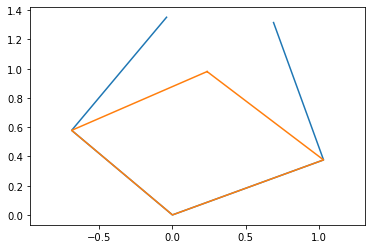

In [25]:
points = PointsOutput(points, constant_values=system.constant_values)
points.calc(numpy.array([ini0,ini]),[0,1])
points.plot_time()

In [26]:
pAcm=pNA+lA/2*A.x
pBcm=pAB+lB/2*B.x
pCcm=pNA+lC/2*C.x
pDcm=pCD+lD/2*D.x

In [27]:
wND = N.get_w_to(D)

In [28]:
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)

BodyA = Body('BodyA',A,pAcm,m,IA,system)
BodyB = Body('BodyB',B,pBcm,m,IB,system)
BodyC = Body('BodyC',C,pCcm,m,IC,system)
BodyC = Body('BodyC',D,pDcm,m,ID,system)

#BodyA = Particle(pAcm,m,'ParticleA',system)
#BodyB = Particle(pBcm,m,'ParticleB',system)
#BodyC = Particle(pCcm,m,'ParticleC',system)
#BodyD = Particle(pDcm,m,'ParticleD',system)

In [29]:
system.addforcegravity(-g*N.y)

In [30]:
eq_d = [item.time_derivative() for item in eq]
eq_dd = [item.time_derivative() for item in eq_d]
eq_dd_scalar = []
eq_dd_scalar.append(eq_dd[0].dot(N.x))
eq_dd_scalar.append(eq_dd[0].dot(N.y))

In [31]:
system.add_constraint(AccelerationConstraint(eq_dd_scalar))

In [32]:
f,ma = system.getdynamics()
func1 = system.state_space_post_invert(f,ma)

2022-03-16 10:11:56,514 - pynamics.system - INFO - getting dynamic equations
2022-03-16 10:11:56,821 - pynamics.system - INFO - solving a = f/m and creating function
2022-03-16 10:11:56,878 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-03-16 10:11:56,974 - pynamics.system - INFO - done solving a = f/m and creating function


In [33]:
fps = 30/(1*idealab_tools.units.time)
tinitial = 0*idealab_tools.units.time
tfinal = 5*idealab_tools.units.time
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]
tolerance = 1e-12

In [34]:
states=pynamics.integration.integrate_odeint(func1,ini,t,rtol=tolerance,atol=tolerance,args=({'constants':system.constant_values},))

2022-03-16 10:11:56,996 - pynamics.integration - INFO - beginning integration
2022-03-16 10:11:56,997 - pynamics.system - INFO - integration at time 0000.00
2022-03-16 10:11:57,243 - pynamics.system - INFO - integration at time 0001.00
2022-03-16 10:11:57,486 - pynamics.system - INFO - integration at time 0001.79
2022-03-16 10:11:57,757 - pynamics.system - INFO - integration at time 0004.10
2022-03-16 10:11:57,923 - pynamics.integration - INFO - finished integration


In [35]:
KE = system.get_KE()
PE = system.getPEGravity(pNA) - system.getPESprings()

2022-03-16 10:11:57,945 - pynamics.output - INFO - calculating outputs
2022-03-16 10:11:57,951 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

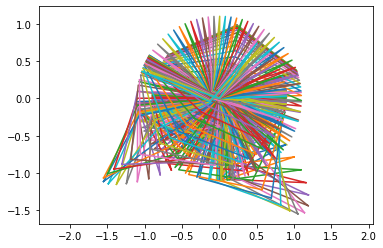

In [36]:
points.calc(states,t)
points.plot_time()

<AxesSubplot:>

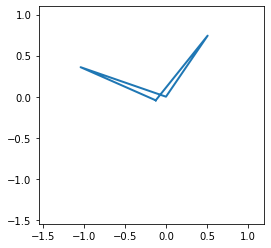

In [37]:
points.animate(fps = fps,movie_name = 'four_bar.mp4',lw=2)

In [38]:
from matplotlib import animation, rc
from IPython.display import HTML
HTML(points.anim.to_html5_video())